In [263]:
import geopandas as gpd
import pandas as pd

#### Shapefile dos setores censitários do Estado de Rondônia

In [264]:
gdf = gpd.read_file('Dados/RO_Setores_2020/RO_Setores_2020.shp')
gdf.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,110001505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,None,"POLYGON ((-61.99890 -11.93178, -61.99887 -11.9..."
1,110001505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,None,"POLYGON ((-61.99996 -11.94202, -62.00570 -11.9..."
2,110001505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,None,"POLYGON ((-62.00377 -11.92940, -62.00375 -11.9..."
3,110001505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,None,"POLYGON ((-61.99902 -11.92686, -61.99901 -11.9..."
4,110001505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,None,"POLYGON ((-62.00653 -11.91785, -62.00645 -11.9..."


#### Filtrando apenas para Porto Velho

In [265]:
porto_velho = gdf.loc[gdf.NM_DIST == 'Porto Velho']
porto_velho.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
1223,110020505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82965 -8.76926, -63.83118 -8.769..."
1224,110020505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82849 -8.76557, -63.82858 -8.765..."
1225,110020505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82849 -8.76557, -63.82856 -8.765..."
1226,110020505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82759 -8.76124, -63.82782 -8.761..."
1227,110020505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82921 -8.75955, -63.83000 -8.759..."


#### Carregando dados de Censo demográficos agregados por Setores Censitários - 2010

In [266]:
censo = pd.read_csv('Dados/Basico_RO.csv', sep=';', encoding='ISO-8859-1')
censo.head()

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,110001505000001,1,Região Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,0,...,"1,91","1000,83","844813,39","1064,05","830862,08","637,19","621087,58","916,17","637455,02",NaN
1,110001505000002,1,Região Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,0,...,"2,39","925,75","755517,65","1044,44","728301,76","555,45","511544,75","885,82","523176,78",NaN
2,110001505000003,1,Região Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,0,...,"1,96","639,29","531392,81","755,86","540230,03","435,05","307764,68","639,91","321632,42",NaN
3,110001505000004,1,Região Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,0,...,"2,67","620,88","212843,17","724,36","172803,92","388,17","186830,91","655,57","139886,96",NaN
4,110001505000005,1,Região Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,0,...,"3,11","425,03","192858,42","573,14","175107,71","283,56","131539,38","494,1","125166,63",NaN


#### Filtrando apenas para Porto Velho

In [267]:
censo_pvh = censo.loc[censo.Nome_do_distrito == 'PORTO VELHO']
censo_pvh.head()

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
999,110020505000001,1,Região Norte,11,Rondônia,1101,Madeira-Guaporé,11001,Porto Velho,0,...,"3,27","840,41","694889,16","1016,9","661007,67","530,49","763116,01","956,96","969496,45",NaN
1000,110020505000002,1,Região Norte,11,Rondônia,1101,Madeira-Guaporé,11001,Porto Velho,0,...,"3,92","910,49","664594,7","986,37","645060,38","486,16","426310,37","806,58","448882,15",NaN
1001,110020505000003,1,Região Norte,11,Rondônia,1101,Madeira-Guaporé,11001,Porto Velho,0,...,"4,08","843,48","830802,47","958,78","833832,35","489,83","465663,94","821,54","508567,94",NaN
1002,110020505000004,1,Região Norte,11,Rondônia,1101,Madeira-Guaporé,11001,Porto Velho,0,...,"3,82","1021,45",1015309,"1096,29","1007618,89","558,94","580862,2","907,01","626973,33",NaN
1003,110020505000005,1,Região Norte,11,Rondônia,1101,Madeira-Guaporé,11001,Porto Velho,0,...,"4,8","876,59","522510,56","942,89","499420,31","494,86","403525,58","762,74","417669,04",NaN


#### Tratando os dados para fazer o merge
1. Renomear a coluna código do setor para Cod_setor ou CD_SETOR
2. Escolher as colunas úteis do censo
3. Verificar tipo de dados do CD_SETOR dos dois datasets

In [268]:
censo_pvh = censo_pvh.rename(columns={'Cod_setor': 'CD_SETOR'})
censo_pvh = censo_pvh.loc[:, ['CD_SETOR', 'Cod_distrito' , 'Nome_do_distrito', 'Cod_bairro', 'Nome_do_bairro', 'V001']]

censo_pvh.head(1)

,CD_SETOR,Cod_distrito,Nome_do_distrito,Cod_bairro,Nome_do_bairro,V001
999,110020505000001,110020505,PORTO VELHO,1100205000,PORTO VELHO (demais setores),121.0


In [269]:
porto_velho.CD_SETOR.dtype == censo_pvh.CD_SETOR.dtype

False

In [270]:
porto_velho.CD_SETOR.dtypes

dtype('O')

In [271]:
censo_pvh.CD_SETOR.dtypes

dtype('int64')

In [272]:
porto_velho = porto_velho.copy() # É necessário "materializar" o sub dataset que foi criado do dataset principal

porto_velho.CD_SETOR = porto_velho.CD_SETOR.astype(int)

porto_velho.CD_SETOR.dtypes

dtype('int64')

#### Merge dos dados

In [273]:
setor_censitario_censo_pvh = porto_velho.merge(censo_pvh, on='CD_SETOR', how='inner')
setor_censitario_censo_pvh.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry,Cod_distrito,Nome_do_distrito,Cod_bairro,Nome_do_bairro,V001
0,110020505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82965 -8.76926, -63.83118 -8.769...",110020505,PORTO VELHO,1100205000,PORTO VELHO (demais setores),121.0
1,110020505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82849 -8.76557, -63.82858 -8.765...",110020505,PORTO VELHO,1100205000,PORTO VELHO (demais setores),273.0
2,110020505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82849 -8.76557, -63.82856 -8.765...",110020505,PORTO VELHO,1100205000,PORTO VELHO (demais setores),316.0
3,110020505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82759 -8.76124, -63.82782 -8.761...",110020505,PORTO VELHO,1100205000,PORTO VELHO (demais setores),249.0
4,110020505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100205,Porto Velho,110020505,Porto Velho,11002050500,None,"POLYGON ((-63.82921 -8.75955, -63.83000 -8.759...",110020505,PORTO VELHO,1100205000,PORTO VELHO (demais setores),256.0


#### Renomear coluna v001 para populacao

In [274]:
setor_censitario_censo_pvh.rename(columns={'V001': 'Populacao'}, inplace=True)

#### Informações do Dataset

In [275]:
setor_censitario_censo_pvh.Populacao.describe()

count    419.000000
mean     231.959427
std      104.445566
min        1.000000
25%      167.000000
50%      231.000000
75%      288.500000
max      829.000000
Name: Populacao, dtype: float64

In [276]:
import contextily as cx
import matplotlib.pyplot as plt

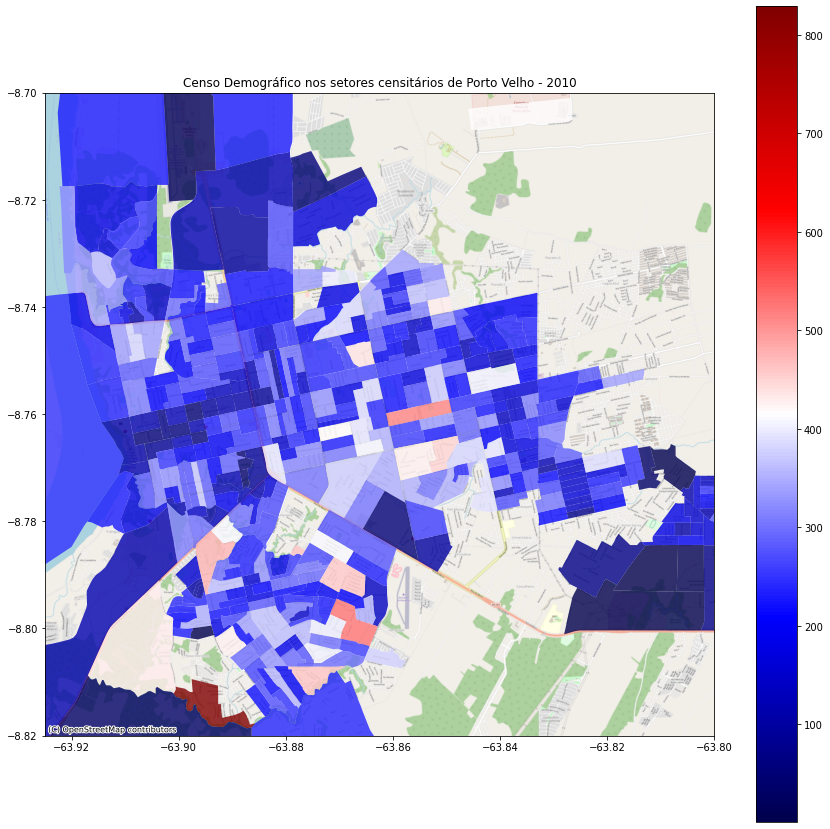

In [277]:
fig, ax = plt.subplots(figsize=(15, 15))

setor_censitario_censo_pvh.plot(ax=ax,
                                column='Populacao',
                                vmin=setor_censitario_censo_pvh.Populacao.min(),
                                vmax=setor_censitario_censo_pvh.Populacao.max(),
                                cmap='seismic',
                                legend=True,
                                missing_kwds={'color': 'white'},
                                alpha=0.8
                                )
plt.xlim(-63.925, -63.8)
plt.ylim(-8.820, -8.7)
plt.title('Censo Demográfico nos setores censitários de Porto Velho - 2010')

cx.add_basemap(ax=ax, crs=setor_censitario_censo_pvh.crs, zoom=15, source= cx.providers.OpenStreetMap.Mapnik)